### Introduction
This tutorial will introduce analysing datas related to stocks (or furtures) by using one of the APIs provided by [Quantopian](www.quantopian.com).

### Introduction to the platform
Before we start the tutorial, let us have a quick introduction on the platform we are using.

For most of the tasks in computing or programming, we are able to achieve what we want by running on a local machine. However, this tutorial is about using Quantopian'a API, which must be run online on the website.

As what we do are online, which means that the iPython notebook is run on a online customized iPython server, there are some functionalities from the API that are already there for us to use.

The list of complete functions available is listed here: https://www.quantopian.com/help#research-env. Note that there functions are never imported explicitly.

### Tutorial content
* Get Pricing Data

* Generate a Moving Average from Pricing Data

* Access Sentiment Data

* Analyse Relations (Oil v.s. Oil Producer)

### Libraries needed (appear in order)
1. pandas

2. numpy

3. matplotlib (can be used internally by API, may not need to import explicitly)

4. blaze

5. seaborn

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Get Pricing Data
Now we will start the fisrt funtion of the API: `get_pricing`.

Every stock or future is represeted by some ticker symbol, which can be found by searching online. The ticker symbol for _Apple Inc._ is **AAPL**

In [265]:
data = get_pricing("AAPL")

type(data)

<class 'pandas.core.frame.DataFrame'>

What been returned here is a pandas dataframe. We can inspect the contents of the dataframe.

In [266]:
data.head()

,open_price,high,low,close_price,volume,price
2013-01-03 00:00:00+00:00,534.453,536.199,527.742,529.195,11788310.0,529.195
2013-01-04 00:00:00+00:00,523.805,525.430,513.236,514.094,20125970.0,514.094
2013-01-07 00:00:00+00:00,509.207,516.328,502.574,511.129,16312375.0,511.129
2013-01-08 00:00:00+00:00,516.240,518.855,508.476,512.319,15004532.0,512.319
2013-01-09 00:00:00+00:00,509.695,512.124,503.344,504.427,13208269.0,504.427


As we can see here, ‘price’, ‘open_price’, ‘high’, ‘low’, ‘close_price’, ‘volume’ of a stock is provided. By default `get_pricing` returns data from '2013-01-03' to '2014-01-03'. However, we can specify the time frame we want by specifing start and end dates by passing values to `start_date` and `end_date`. Dates can be passed as python `datetime` objects, pandas `Timestamps`, or string that can be parsed by pandas.

Let's try this out with the stock of Microsoft("MSFT"). 

In [267]:
msft_data = get_pricing(
    "MSFT",
    start_date='2013-01-01',
    end_date='2017-01-01')

msft_data.head()

,open_price,high,low,close_price,volume,price
2013-01-02 00:00:00+00:00,24.393,24.823,24.304,24.657,48220986.0,24.657
2013-01-03 00:00:00+00:00,24.733,24.751,24.313,24.420,42398350.0,24.420
2013-01-04 00:00:00+00:00,24.411,24.474,23.928,23.955,48453319.0,23.955
2013-01-07 00:00:00+00:00,23.964,24.062,23.847,23.910,35036537.0,23.910
2013-01-08 00:00:00+00:00,23.946,23.981,23.686,23.758,39873106.0,23.758


Now with date as index we can plot the price of a stock using date as X-axis and price as Y-axis

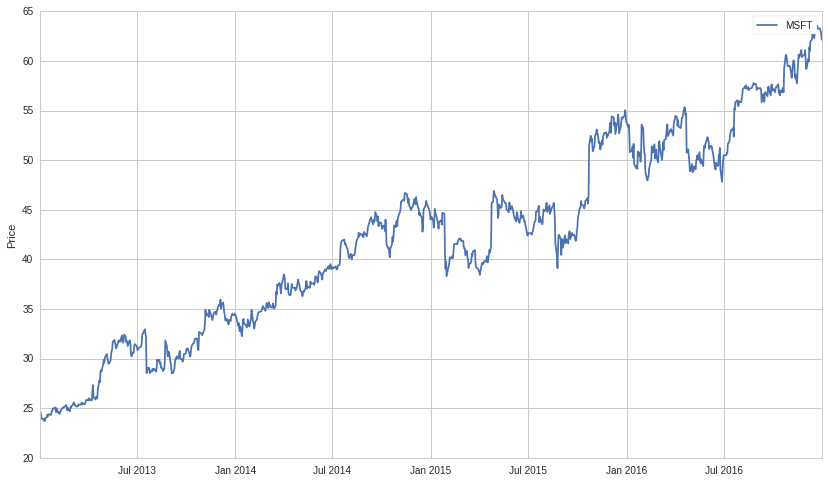

In [268]:
msft_price = msft_data['price']

plt.plot(msft_price.index, msft_price.values)

plt.ylabel('Price')

plt.legend(["MSFT"]);

Some useful characteristics can be gained now.

In [269]:
np.mean(msft_price)

42.18779464285713

In [270]:
np.std(msft_price)

9.867587951402397

_**Now we can get information on returns of this stock**_

`pandas.Series.pct_change()` is used here, it calculates the return of a day relative to the price the day before. There will be no return information (NaN) for the first day thus we start from the second day.

In [271]:
msft_return = msft_price.pct_change()[1:]

A histogram will show us the general distribution of the return. Let's try it now:

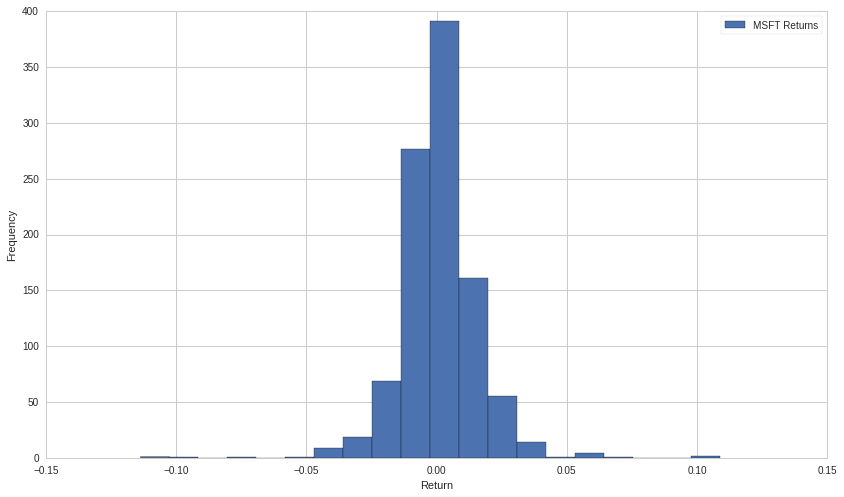

In [272]:
plt.hist(msft_return, bins=20)

plt.xlabel('Return')

plt.ylabel('Frequency')

plt.legend(['MSFT Returns']);

### Generat a Moving Average from Pricing Data
When we analysis a stock or any financial equity, we often look at its prices with different periods of moving averages. 
A moving average of n days means the average price of this stock or equity in the last n days.

This can be achieved by using the `rolling_mean` method in `pandas.Series`.

Note that there will be no moving average in the first n days

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


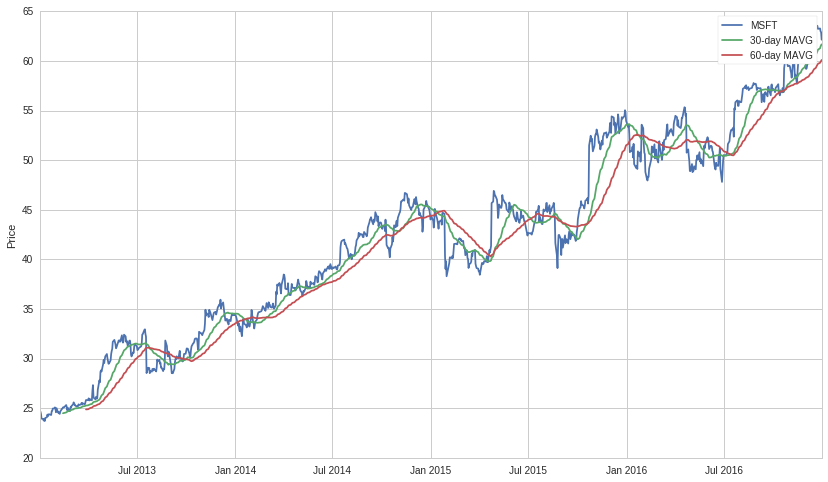

In [273]:
# Take n as 30 and 60 here
MAVG30 = pd.rolling_mean(msft_price,window = 30)

MAVG60 = pd.rolling_mean(msft_price, window=60)

plt.plot(msft_price.index, msft_price.values)

plt.plot(MAVG30.index, MAVG30.values)

plt.plot(MAVG60.index, MAVG60.values)

plt.ylabel('Price')

plt.legend(['MSFT', '30-day MAVG', '60-day MAVG']);

Note that `Series.rolling` for security reason is not support on Quantopian yet, so `rolling_mean` is used here.

### Access Sentiment Data
In sentiment signal 6 is the most positive and -3 is the most negative. 6 and -3 are as strong, so it is not a linear scale.

For more about sentiment data, especially its scale, checkout:
1. General infomation: http://sentdex.com/how-sentdex-works/

2. Sentimental Scale:http://sentdex.com/blog/back-testing-sentdex-sentiment-analysis-signals-for-stocks



In [274]:
from quantopian.interactive.data.sentdex import sentiment

Sentiment data can be imported easily in the API environment. However, sentiment data is in the form of blaze expression and the forcus of this tutorial is not on how to use blaze.  
Therefore we import the blaze library and convert `sentiment` into a pandas `DataFrame`.

In [275]:
type(sentiment)

<class 'blaze.expr.expressions.Field'>

In [276]:
import blaze

sentiment_df = blaze.compute(sentiment)

Let's have a quick view of what is in the DataFrame.

In [277]:
sentiment_df.head()

,symbol,sentiment_signal,sid,asof_date,timestamp
0,AAPL,6.0,24,2012-10-15,2012-10-16
1,AAPL,2.0,24,2012-10-16,2012-10-17
2,AAPL,6.0,24,2012-10-17,2012-10-18
3,AAPL,6.0,24,2012-10-18,2012-10-19
4,AAPL,6.0,24,2012-10-19,2012-10-20


In [278]:
sentiment_df.tail()

,symbol,sentiment_signal,sid,asof_date,timestamp
9996,SHLD,-1.0,26169,2013-01-23,2013-01-24
9997,FHN,2.0,26204,2013-01-23,2013-01-24
9998,HSP,6.0,26243,2013-01-23,2013-01-24
9999,NILE,4.0,26315,2013-01-23,2013-01-24
10000,GNW,2.0,26323,2013-01-23,2013-01-24


Let only grab sentiment data from Microsoft from 2013-01-01 to 2017-01-01 as before. (the sid of Microsoft is 5061)

In [279]:
symbols('MSFT').sid

5061

In [280]:
sentiment_msft = sentiment[sentiment.sid == 5061]

sentiment_msft = blaze.compute(sentiment_msft)

In [281]:
sentiment_msft = sentiment_msft.loc[
    (sentiment_msft['asof_date'] > '2013-01-01') 
    & (sentiment_msft['asof_date'] <= '2017-01-01')]

In [282]:
sentiment_msft.set_index('asof_date', inplace=True)

`msft_return` we got from fisrt part of tutorial has is timezone aware and we have to localize it before join operation

In [283]:
msft_senti_return = sentiment_msft.join(msft_return.tz_localize(None),how ='inner')

In [284]:
msft_senti_return.head()

,symbol,sentiment_signal,sid,timestamp,price
2013-01-03,MSFT,1.0,5061,2013-01-04,-0.009612
2013-01-04,MSFT,-1.0,5061,2013-01-05,-0.019042
2013-01-07,MSFT,4.0,5061,2013-01-08,-0.001879
2013-01-08,MSFT,2.0,5061,2013-01-09,-0.006357
2013-01-09,MSFT,1.0,5061,2013-01-10,0.006019


Let's now have a look of the percentage of how may time sentiment and return have the same sign

In [285]:
count = 0
count_zero = 0
for index, row in msft_senti_return.iterrows():
    if row['sentiment_signal'] * row['price'] > 0:
        count += 1
    elif row['sentiment_signal'] * row['price'] == 0:
        count_zero += 1
print(float(count) / float(msft_senti_return.index.size-count_zero)*100)

50.1


### Analyse Relations (Oil v.s. Oil Producer)

After know some basic features of API, we can start explore different stocks and futures.



In [286]:
producer = symbols('XLE') # ETF for oil producers

oil = symbols('WTI') # Oil price

We first get the daily close price of both and then plot the price together to illustrate the correlation.

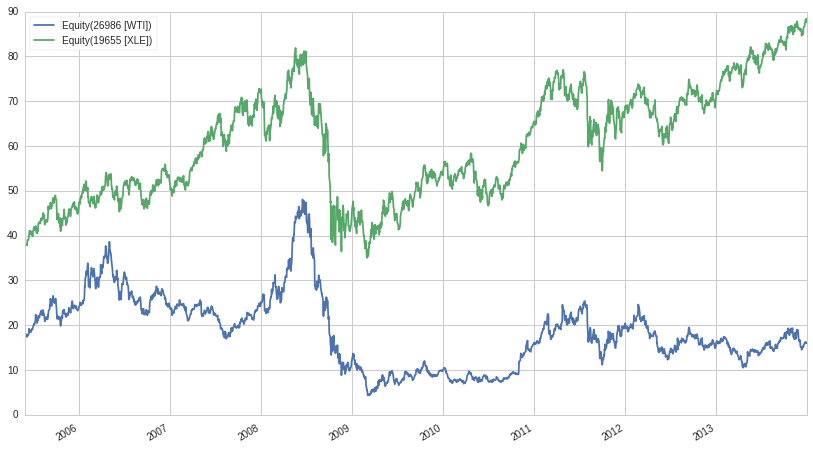

In [287]:
data = get_pricing([oil, producer],
                  fields='close_price',
                  start_date = '2005-06-01',
                  end_date = '2013-12-31')

data.plot();

Use `pct_change` mentioned at the first part of tutorial we get the relative returns.

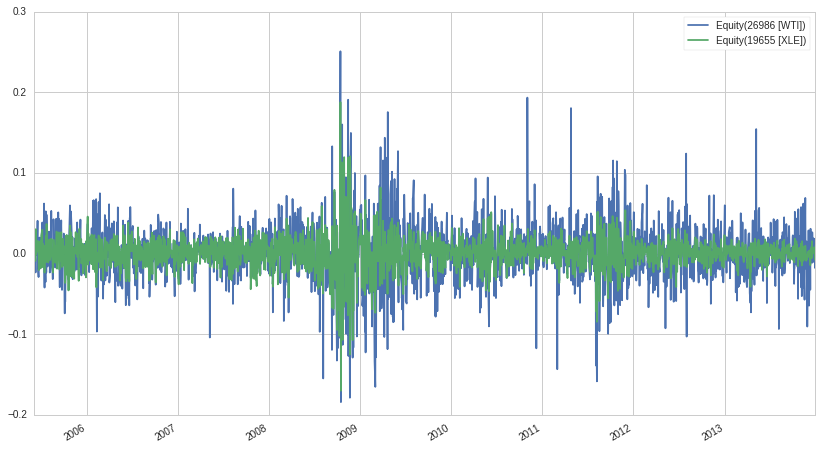

In [288]:
returns = data.pct_change().dropna()

returns.plot()

Now we import `seaborn`, for statistical plotting. We will be using displot function, which shows us the dirstribution of *$*WTI

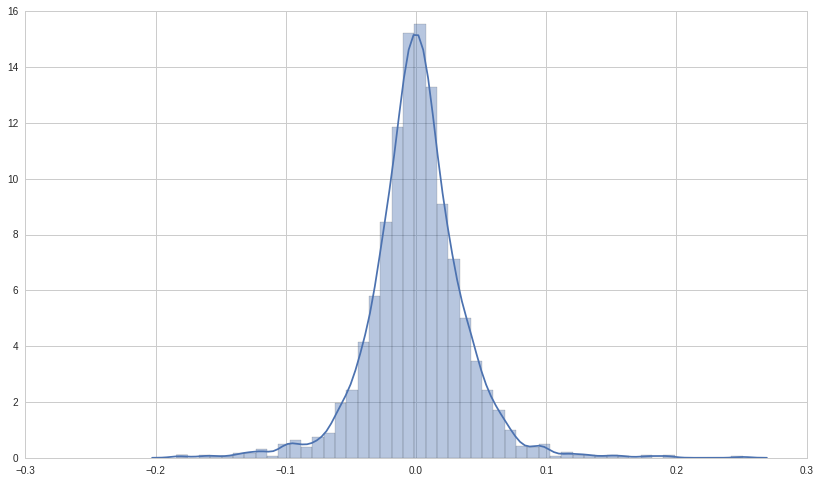

In [289]:
import seaborn as sns

sns.distplot(returns.iloc[:,0:1]);

Now we can find out the correlation between *$*WTI and *$*XLE by running a linear regression and plotting the best fitting line.

In [290]:
returns.head()

,Equity(26986 [WTI]),Equity(19655 [XLE])
2005-06-02 00:00:00+00:00,0.035022,0.000000
2005-06-03 00:00:00+00:00,0.001778,0.004457
2005-06-06 00:00:00+00:00,-0.003550,0.002599
2005-06-07 00:00:00+00:00,-0.007626,-0.009139
2005-06-08 00:00:00+00:00,-0.023333,0.001771


In [291]:
returns.iloc[:,0].pct_change().dropna().head()

2005-06-03 00:00:00+00:00   -0.949233
2005-06-06 00:00:00+00:00   -2.996450
2005-06-07 00:00:00+00:00    1.148251
2005-06-08 00:00:00+00:00    2.059829
2005-06-09 00:00:00+00:00   -1.295353
Freq: C, Name: Equity(26986 [WTI]), dtype: float64

The confidence interval is shown as shaded region. The Pearson regression coefficient and p-value is labeled on the graph.

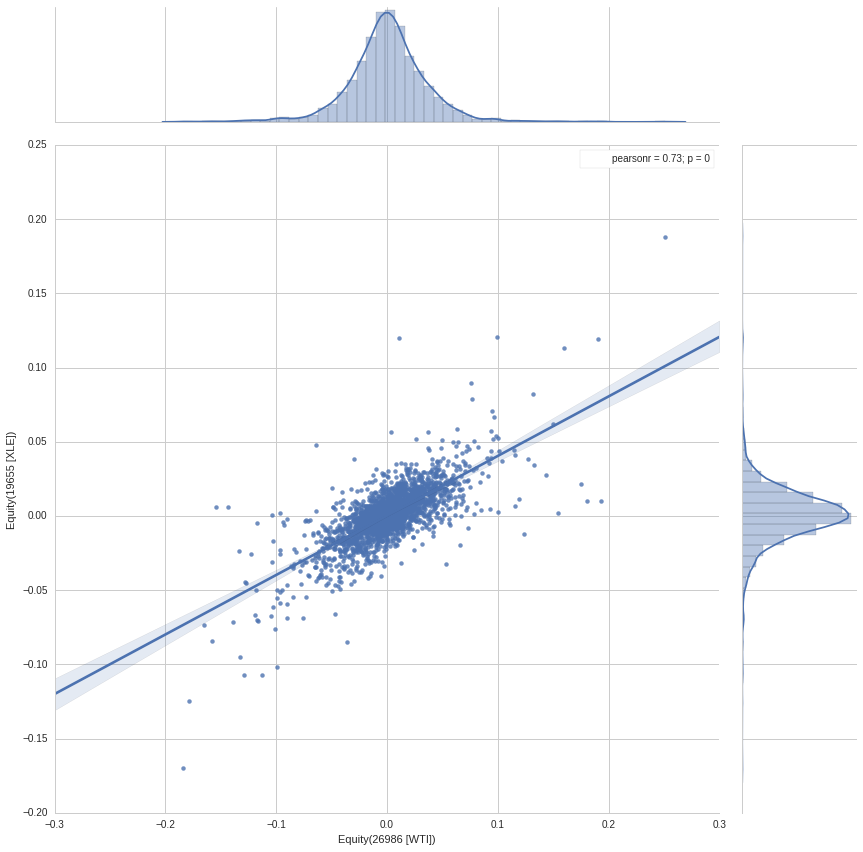

In [292]:
WTI = get_pricing(oil,
                  fields='close_price',
                  start_date = '2005-06-01',
                  end_date = '2013-12-31')
XLE = get_pricing(producer,
                  fields='close_price',
                  start_date = '2005-06-01',
                  end_date = '2013-12-31')

returns_WTI = WTI.pct_change().dropna()

returns_XLE = XLE.pct_change().dropna()

sns.jointplot(returns_WTI, returns_XLE, kind='reg', size=12)

From correlation analysis we are about to analyze corelation in investing in two stocks or any equities.

### Conclusion...
In this tutorial, we used the Quantopian research API to access and manipulate data related to stocks. Data includes stocks pricing data, trading volume and sentiment data related to a stock.

### And more!
However, as everyone who is interested in using computing power in financial marktet might wonder, what we are doing are just _**analysing the data**_, but is it possible for us to write an algorithm for a sepcific _**trading strategy**_ and test it on the Quantopian platform?

Turns out that the answer is a firm "Yes". There is another different API, which is an IDE, that allows us to do backtesting(1) and paper trading(2) in stocks or futures on Quantopian.

Check out [Quantopian Algorithm](https://www.quantopian.com/algorithms) for these functionalities.

Explanation:
1. backtesting: the process of testing a trading strategy on relevant historical data as if you are trading on live.

2. paper trading: sometimes known as walk-forward, or out-of-sample testing. In paper trading, your algorithm gets live market data (actually, 15-minute delayed data in Quantopian) and 'trades' against the live data with a simulated portfolio.




### Further Resourse:
1. Quantopian Tutorials: <https://www.quantopian.com/tutorials>

2. Quantopian Help (documentation and explanation of the whole website and different functions): <https://www.quantopian.com/help>

3. Research Environment API: https://www.quantopian.com/help#research-env

4. pandas documentation: https://pandas.pydata.org/pandas-docs/stable/

5. Quantopian Algorithm: https://www.quantopian.com/algorithms
